In [1]:
#Done
import numpy as np
import pandas as pd
import pyswarms as ps

dataframe=pd.read_csv("C:\\Users\\DELL\\Downloads//forestfires (2).csv",encoding="ISO-8859-1")

dataframe.head()

dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

dataframe['month'].head()

# use the 'category' data type  to store the 'month' strings as integers
dataframe['month']=dataframe.month.astype('category')


dataframe['day'].replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

print('Header:',dataframe.head())

Header:    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  area1
0  7  5     3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0    0.0
1  7  4    10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0    0.0
2  7  4    10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0    0.0
3  8  6     3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0    0.0
4  8  6     3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0    0.0


In [2]:

dataframe['day']=dataframe.day.astype('int64')
dataframe.dtypes

X           int64
Y           int64
month    category
day         int64
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
area1     float64
dtype: object

In [3]:
print('Header:',dataframe.head(10))

Header:    X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area  \
0  7  5     3    5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0   
1  7  4    10    2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0   
2  7  4    10    6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0   
3  8  6     3    5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0   
4  8  6     3    7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0   
5  8  6     8    7  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0   
6  8  6     8    1  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0   
7  8  6     8    1  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0   
8  8  6     9    2  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0   
9  7  5     9    6  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0   

   area1  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
5    0.0  
6    0.0  
7    0.0  
8    0.0  
9    0.0  


In [4]:
#Analysing our dataset for predictions


In [5]:



dataframe.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
area1    251
dtype: int64

In [6]:
dataframe.describe()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area1
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.011777
std,2.313778,1.229900,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.058355
min,1.000000,2.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000477
75%,7.000000,5.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.006023
max,9.000000,9.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [7]:
print('Statistics For Data:',dataframe.describe())

Statistics For Data:                 X           Y         day        FFMC         DMC          DC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    4.259188   90.644681  110.872340  547.940039   
std      2.313778    1.229900    2.072929    5.520111   64.046482  248.066192   
min      1.000000    2.000000    1.000000   18.700000    1.100000    7.900000   
25%      3.000000    4.000000    2.000000   90.200000   68.600000  437.700000   
50%      4.000000    4.000000    5.000000   91.600000  108.300000  664.200000   
75%      7.000000    5.000000    6.000000   92.900000  142.400000  713.900000   
max      9.000000    9.000000    7.000000   96.200000  291.300000  860.600000   

              ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     9.021663   18.889168   44.288201    4.017602    0.021663   
std      4.559477    5.806625   16.317469 

In [8]:
dataframe.shape

(517, 14)

In [9]:
print('Data Types:',dataframe.dtypes)

Data Types: X           int64
Y           int64
month    category
day         int64
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
area1     float64
dtype: object


In [10]:
data= dataframe.values
A= data[:,0:12]
B= data[:,12]

In [11]:
print(A)

[[7 5 3 ... 51 6.7 0.0]
 [7 4 10 ... 33 0.9 0.0]
 [7 4 10 ... 33 1.3 0.0]
 ...
 [7 4 8 ... 70 6.7 0.0]
 [1 4 8 ... 42 4.0 0.0]
 [6 3 11 ... 31 4.5 0.0]]


In [12]:
print(B)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.36 0.43 0.47 0.55 0.61
 0.71 0.77 0.9 0.95 0.96 1.07 1.12 1.19 1.36 1.43 1.46 1.46 1.56 1.61 1.63
 1.64 1.69 1.75 1.9 1.94 1.95 2.01 2.14 2.29 2.51 2.53 2.55 2.57 2.69 2.74
 3.07 3.5 4.53 4.61 4.69 4.88 5.23 5.33 5.44 6.38 6.83 6.96 7.04 7.19 7.3
 7.4 8.24 8.31 8.68 8.71 9.41 10.01 10.02 10.93 11.06 11.24 11.32 11.53
 12.1 13.05 13.7 13.99 14.57 15.45 17.2 19.23 23.41 24.23 26.0 26.13 27.35
 28.66 28.66 29.48 30.32 31.72 31.86 32.07 3

In [293]:
cols1=dataframe.columns.values[0:12]
cols1

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'], dtype=object)

In [294]:
cols2=dataframe.columns.values[13]
cols2

'area1'

In [25]:
df1=dataframe[cols1]
df1
df1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [24]:
print(type(A))

<class 'numpy.ndarray'>


In [27]:


model =SVR(kernel="linear")

rfe = RFE(model,n_features_to_select=3)
fit1= rfe.fit(A,B)
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Feature Ranking: ", rfe.ranking_) 

Number of Features:  3
Selected Features:  [False  True False False False False False False False False  True  True]
Feature Ranking:  [ 3  1  2  4  7  9 10  6  5  8  1  1]


In [141]:
import pyswarms as ps

In [295]:
#Acco. to Recursive Feature Elimination 3 features that helps the most in predicting the burned area of forest are:RH,DMC,temp.
dataframe.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area1
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


In [296]:
from sklearn.linear_model import LinearRegression

In [297]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [298]:
correlation=dataframe.corr(method='pearson')
correlation

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area1
X,1.000000,0.539548,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.063385
Y,0.539548,1.000000,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.044873
day,-0.024922,-0.005453,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,0.023226
FFMC,-0.021039,-0.046308,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.040122
DMC,-0.048384,0.007782,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.072994
DC,-0.085916,-0.101178,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.049383
ISI,0.006210,-0.024488,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008258
temp,-0.051258,-0.024103,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.097844
RH,0.085223,0.062221,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.075519
wind,0.018798,-0.020341,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.012317


In [299]:
corr_array =np.array(correlation)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


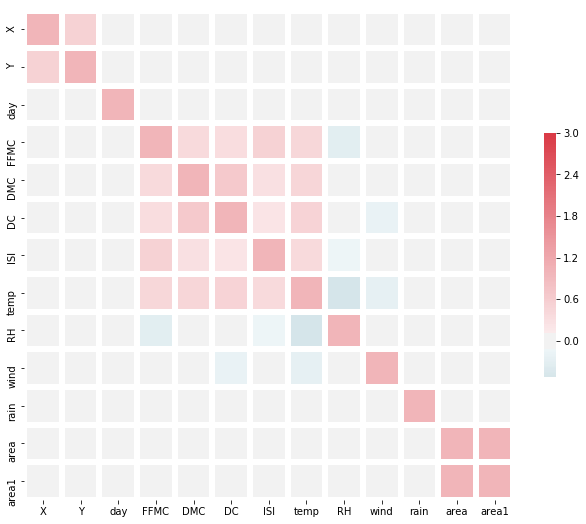

In [300]:
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(correlation,cmap=cmap,vmax=3,center=0,square=True,linewidth=5,cbar_kws={'shrink': .5})

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

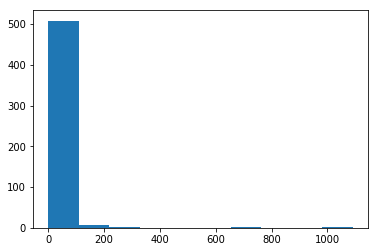

In [301]:
#'temp' has the highest correlation with the area of forest fire which is in positive value i.e-positive correlation.
#'rain'has the least corerelation i.e-negative correlation
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist((dataframe.area))

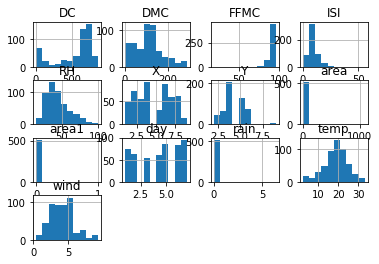

In [302]:
import matplotlib.pyplot as plt
dataframe.hist()
plt.show()

X            AxesSubplot(0.125,0.71587;0.168478x0.16413)
Y         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
day       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
FFMC      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
DMC         AxesSubplot(0.125,0.518913;0.168478x0.16413)
DC       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ISI      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
temp     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RH          AxesSubplot(0.125,0.321957;0.168478x0.16413)
wind     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
rain     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
area     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
area1          AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

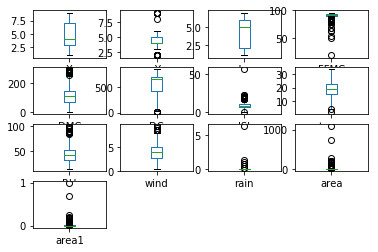

In [303]:
#'Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

In [38]:
helper = ["RH","X","Y","area","day","month","rain","temp","wind","DMC","FFMC","DC","ISI"]

    #dataframe.+helper[i]+.value_counts().plot(kind='bar')
#d2.loc[0]=[a]
#d2.head()

In [39]:
#dataframe.area.value_counts()
dataframe['area'].value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
2.14       2
2.18       2
1.56       2
9.96       2
28.66      2
1.46       2
0.68       2
0.43       2
1.64       2
6.43       2
9.27       2
0.52       2
1.75       2
11.06      2
1.63       2
17.20      1
48.55      1
0.95       1
0.77       1
11.19      1
15.64      1
2.64       1
3.52       1
38.48      1
5.39       1
        ... 
1.61       1
1.07       1
6.38       1
5.86       1
3.19       1
11.16      1
8.85       1
86.45      1
5.18       1
30.18      1
2.01       1
1.01       1
20.03      1
0.79       1
49.59      1
4.41       1
7.02       1
0.71       1
9.41       1
0.09       1
3.32       1
11.53      1
5.55       1
3.20       1
4.88       1
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

27     33
39     24
35     20
43     17
42     17
45     16
34     16
40     15
33     15
46     14
24     13
44     13
32     12
51     12
28     11
41     11
38     11
53     11
25     10
54      9
47      9
36      9
29      9
50      8
59      8
64      8
37      8
56      7
31      7
48      7
       ..
75      4
63      4
77      4
65      3
79      3
52      3
67      3
61      3
62      3
72      3
15      2
74      2
82      2
86      2
68      2
90      2
99      1
94      1
17      1
18      1
97      1
20      1
96      1
87      1
88      1
84      1
80      1
76      1
69      1
100     1
Name: RH, Length: 75, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
4    91
6    86
2    73
8    61
7    60
3    55
1    48
5    30
9    13
Name: X, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
4    203
5    125
6     74
3     64
2     44
9      6
8      1
Name: Y, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
0.00     247
1.94       3
3.71       2
0.90       2
1.95       2


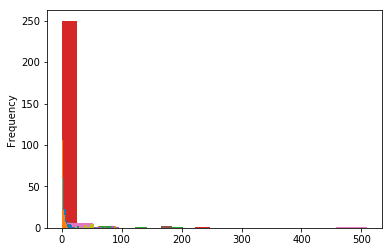

In [40]:
helper = ["RH","X","Y","area","day","month","rain","temp","wind","DMC","FFMC","DC","ISI"]
for i in range(12):
    print(dataframe[helper[i]].value_counts())
    print(dataframe[helper[i]].value_counts().plot(kind='hist'))
#d2.loc[0]=[a]
#d2.head()

In [41]:
for j in range(12):
    print(dataframe[helper[j]].sort_values())
    #print(dataframe[helper[j]].sort_values().plot(kind='hist'))

85      15
197     15
50      17
111     18
218     19
421     19
393     19
79      19
241     20
279     21
277     21
276     21
14      21
230     21
278     21
491     21
94      22
481     22
145     22
192     22
194     22
281     24
45      24
267     24
417     24
55      24
36      24
28      24
30      24
125     24
      ... 
350     75
372     75
462     76
464     77
370     77
369     77
448     77
31      78
443     78
104     78
312     78
374     78
472     79
223     79
75      79
445     80
478     82
463     82
261     84
7       86
335     86
98      87
451     88
286     90
299     90
304     94
211     96
3       97
4       99
379    100
Name: RH, Length: 517, dtype: int64
439    1
87     1
86     1
85     1
84     1
83     1
82     1
81     1
80     1
79     1
78     1
77     1
398    1
217    1
392    1
231    1
88     1
237    1
200    1
457    1
139    1
143    1
451    1
154    1
443    1
325    1
434    1
431    1
428    1
174    1
      ..
181    8
415  

In [334]:
import seaborn as sns

In [335]:
%matplotlib inline

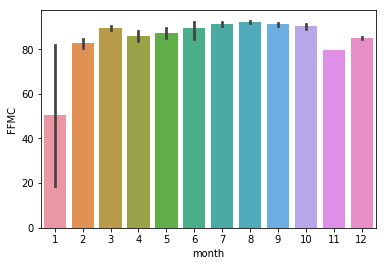

In [338]:
#Plots for Categorical Data
sns.barplot(x='month',y='FFMC',data=dataframe)

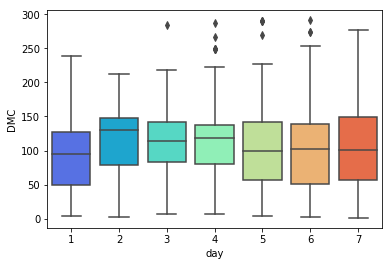

In [45]:
sns.boxplot(x="day", y="DMC", data=dataframe,palette='rainbow')

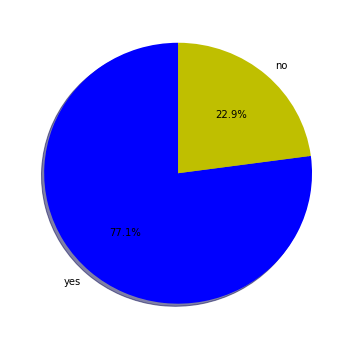

In [46]:
df=dataframe[dataframe['area']<dataframe['temp']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['b','y'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()


In [304]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [49]:

num = len(A)

corpus = []
corpus.append(('LiR', LinearRegression()))
corpus.append(('RandomForest', RandomForestRegressor()))
corpus.append(('CART', DecisionTreeRegressor()))
corpus.append(('SVM', SVR(kernel='linear')))


a = []
b = []

for name, model in corpus:
    print(name)
    rfe = RFE(model)
    fit1= rfe.fit(A,B)
    print("Number of Features: ", rfe.n_features_)
    print("Selected Features: ", rfe.support_)
    print("Feature Ranking: ", rfe.ranking_) 
    
    pred = fit1.predict(A)
    B=B.astype('int')
    pred=pred.astype('int')
    score =accuracy_score(B, pred)
    score1=explained_variance_score(B,pred)
    mae = mean_absolute_error(pred, B)
    a.append(mae)
    b.append(name)
    abc="%s: %f (%f) (%f)" % (name,score,score1,mae)
    print(abc)

LiR
Number of Features:  6
Selected Features:  [ True  True  True False False False False False  True False  True  True]
Feature Ranking:  [1 1 1 3 6 5 7 2 1 4 1 1]
LiR: 0.013540 (0.016794) (18.957447)
RandomForest
Number of Features:  6
Selected Features:  [False  True False False False  True  True False  True  True  True False]
Feature Ranking:  [3 1 6 5 2 1 1 4 1 1 1 7]
RandomForest: 0.295938 (0.863239) (7.330754)
CART
Number of Features:  6
Selected Features:  [False  True False  True  True  True  True False  True False False False]
Feature Ranking:  [5 1 6 1 1 1 1 4 1 2 3 7]
CART: 0.955513 (0.999523) (0.226306)
SVM
Number of Features:  6
Selected Features:  [ True  True  True  True False False False False False False  True  True]
Feature Ranking:  [1 1 1 1 5 6 7 3 2 4 1 1]
SVM: 0.508704 (-0.000135) (12.578337)


In [13]:
import numpy as np
import random

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx


In [14]:
data= dataframe.values
C=data[:,13]

In [ ]:
Neural Network Through Particle Swarm Optimization

In [15]:
def forward_prop(params):
 
    # Neural network architecture
    n_inputs = 12
    n_hidden1 = 7
    n_hidden2 =7
    n_classes = 1
    # Roll-back the weights and biases
    W1 = params[0:84].reshape((n_inputs,n_hidden1))
    b1 = params[84:91].reshape((n_hidden1,))
    W2 = params[91:140].reshape((n_hidden1,n_hidden2))
    b2 = params[140:147].reshape((n_hidden2,))
    W3 = params[147:154].reshape((n_hidden2,n_classes))
    b3 = params[154:155].reshape((n_classes))
    
    # Perform forward propagation
    z1 = A.dot(W1) + b1# Pre-activation in Layer 1
    #xx=np.tanh(0.5)
    #print(xx)
    #print(W2.dtype)
    z1=np.array(z1,dtype=np.float32)
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2# Pre-activation in Layer 2
    a2 = np.tanh(z2)     # Activation in Layer 1
    z3 = a2.dot(W3) + b3# Pre-activation in Layer 2
    z4=np.array(z3,dtype=np.float32)
    
    logits = z4          # Logits for Layer 2
    # Softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    W1,W2,W3= backward(A,C,probs,W1,W2,W3,z1,z2)

    from sklearn.metrics import mean_squared_error
    loss=mean_squared_error(C,probs)
    #print(loss)

    return loss

In [16]:
def f(x):
    n_particles = x.shape[0]
    #print(type(x))
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [20]:
options = {'c1': 0.5, 'c2': 0.5, 'w':0.9}

dimensions = (7*12)+(1*7)+(7*7)+7+7+1

optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)
print(optimizer)
# Perform optimization
cost, pos = optimizer.optimize(f, print_step=200, iters=1000, verbose=3)

INFO:pyswarms.backend.topology.base:Running on `dynamic` topology, neighbors are updated regularly.Set `static=True` for fixed neighbors.
INFO:pyswarms.single.global_best:Arguments Passed to Objective Function: {}


INFO:pyswarms.single.global_best:Iteration 1/1000, cost: 0.9799825506460723
INFO:pyswarms.single.global_best:Iteration 201/1000, cost: 0.9799825506460723
INFO:pyswarms.single.global_best:Iteration 401/1000, cost: 0.9799825506460723
INFO:pyswarms.single.global_best:Iteration 601/1000, cost: 0.9799825506460723
INFO:pyswarms.single.global_best:Iteration 801/1000, cost: 0.9799825506460723
INFO:pyswarms.single.global_best:================================
Optimization finished!
Final cost: 0.9800
Best value: [ 0.199416 0.910182 0.365807 ...]



In [23]:
def predict(A, pos):
    #print(val)
    # Neural network architecture
    n_inputs = 12
    n_hidden1 = 7
    n_hidden2 =7
    n_classes = 1
    # Roll-back the weights and biases
    W1 = pos[0:84].reshape((n_inputs,n_hidden1))
    b1 = pos[84:91].reshape((n_hidden1,))
    W2 = pos[91:140].reshape((n_hidden1,n_hidden2))
    b2 = pos[140:147].reshape((n_hidden2,))
    W3 = pos[147:154].reshape((n_hidden2,n_classes,))
    b3 = pos[154:155].reshape((n_classes,))
    #z0=val
    z1 = A.dot(W1) + b1
    z1=np.array(z1,dtype=np.float32)
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2# Pre-activation in Layer 2
    a2 = np.tanh(z2)     # Activation in Layer 1
    z3 = a2.dot(W3) + b3# Pre-activation in Layer 2
    z4=np.array(z3,dtype=np.float32)
    
    logits =z4
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    W1,W2,W3= backward(A,C,probs,W1,W2,W3,z1,z2)
    y_pred= np.argmax(logits, axis=1)
    return y_pred
(predict(A, pos) == C).std()

0.4995049721467856

In [18]:
def sigmoidPrime(s):
    #derivative of sigmoid
    return s * (1 - s)

In [19]:
def backward(X, y, o,W1, W2, W3, z1, z2):
    # backward propgate through the network
    for i in range(len(y)):
        
        o_error = y[i] - o[i] # error in output
        o_delta = o_error*sigmoidPrime(o) # applying derivative of sigmoid to error

        z2_error = o_delta.dot(W3.T) # z2 error: how much our hidden layer weights contributed to output error
        z2_delta = z2_error*sigmoidPrime(z2) # applying derivative of sigmoid to z2 error
        z1_error = z2_delta.dot(W2.T) # z2 error: how much our hidden layer weights contributed to output error
        z1_delta = z1_error*sigmoidPrime(z1) # applying derivative of sigmoid to z2 error
        #type(X)
        #print(type(X))
        X=np.array(X,dtype=np.float32)
        W1 += X.T.dot(z1_delta) # adjusting first set (input --> hidden) weights
        W2 += z1.T.dot(z2_delta)# adjusting second set (hidden --> output) weights
        W3+=  z2.T.dot(o_delta)
    return W1, W2, W3

In [33]:
type(X)

NameError: name 'X' is not defined